# 1. Seasonality

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose  # Seasonality, Trends, Transpose 
from statsmodels.graphics.tsaplots import plot_acf   # Autocorrelation

In [2]:
# Generate data
np.random.seed(85)
dates = pd.date_range(start="2023-01-01", periods=1000, freq='D')
values = np.random.rand(1000)

dates, values

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10',
                ...
                '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-20',
                '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
                '2025-09-25', '2025-09-26'],
               dtype='datetime64[ns]', length=1000, freq='D'),
 array([0.62037381, 0.50895307, 0.29824484, 0.65379871, 0.27350653,
        0.52312608, 0.37324974, 0.36927859, 0.7346936 , 0.64863888,
        0.92579673, 0.22714814, 0.40555275, 0.88368074, 0.20890112,
        0.21378726, 0.28344035, 0.45312884, 0.33757139, 0.01173726,
        0.39694687, 0.68914231, 0.83520331, 0.31578849, 0.71918911,
        0.50498986, 0.3674922 , 0.18296085, 0.53665916, 0.03160998,
        0.59859214, 0.77609494, 0.22372453, 0.62627289, 0.41232011,
        0.62107257, 0.23957974, 0.30725726, 0.25829266, 0.093765

In [3]:
# Create a dataframe
data = pd.DataFrame({'Date': dates, 'Value': values})

data

,Date,Value
0,2023-01-01,0.620374
1,2023-01-02,0.508953
2,2023-01-03,0.298245
3,2023-01-04,0.653799
4,2023-01-05,0.273507
...,...,...
995,2025-09-22,0.203958
996,2025-09-23,0.080595
997,2025-09-24,0.379506
998,2025-09-25,0.328634


In [4]:
# Save as a csv file
data.to_csv('./data/time_data_sample.csv', index=False, encoding='utf-8')

In [5]:
# Check the file
data = pd.read_csv('./data/time_data_sample.csv',
                  parse_dates=['Date'],   # `parse_date`: Parse data to types date/time
                  index_col='Date')       # `index_col`: Set a column as an index

data

,Value
Date,
2023-01-01,0.620374
2023-01-02,0.508953
2023-01-03,0.298245
2023-01-04,0.653799
2023-01-05,0.273507
...,...
2025-09-22,0.203958
2025-09-23,0.080595
2025-09-24,0.379506


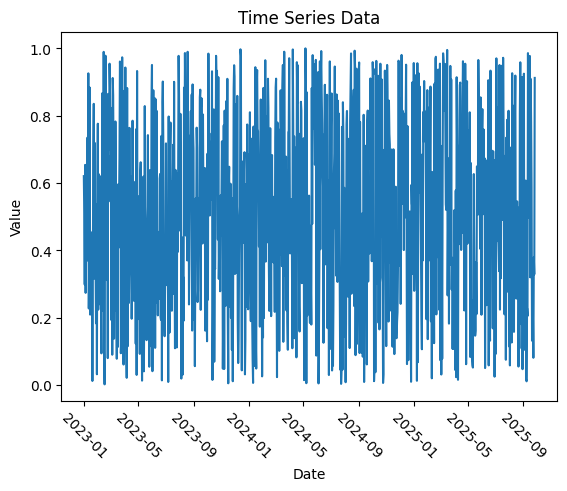

In [6]:
# Visualization
plt.plot(data.index, data['Value'])
plt.xticks(rotation=-45)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')

plt.show()

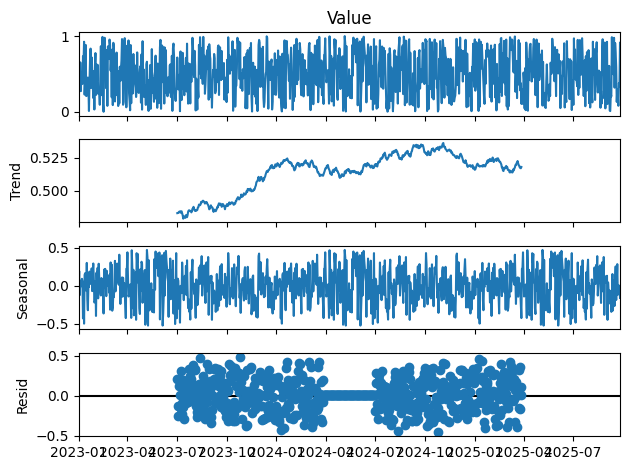

In [7]:
# Trend Analysis
result = seasonal_decompose(data['Value'], 
                            model='additive',
                            period=365)   # 365 days

result.plot()
plt.show()

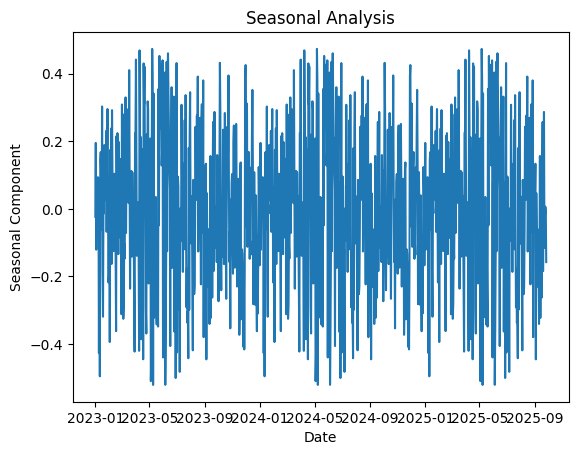

In [8]:
# Seasonality Analysis
seasonal_component = result.seasonal

plt.plot(seasonal_component)
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Analysis')
plt.show()

# 2. Autocorrelation Function

- Autocorrelation Function
  : Determine the autocorrelation pattern of time series data

In [9]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Load data
data = pd.read_csv('./data/time_data_sample.csv',
                  parse_dates=['Date'],   # `parse_date`: Parse data to types date/time
                  index_col='Date')       # `index_col`: Set a column as an index

data

,Value
Date,
2023-01-01,0.620374
2023-01-02,0.508953
2023-01-03,0.298245
2023-01-04,0.653799
2023-01-05,0.273507
...,...
2025-09-22,0.203958
2025-09-23,0.080595
2025-09-24,0.379506


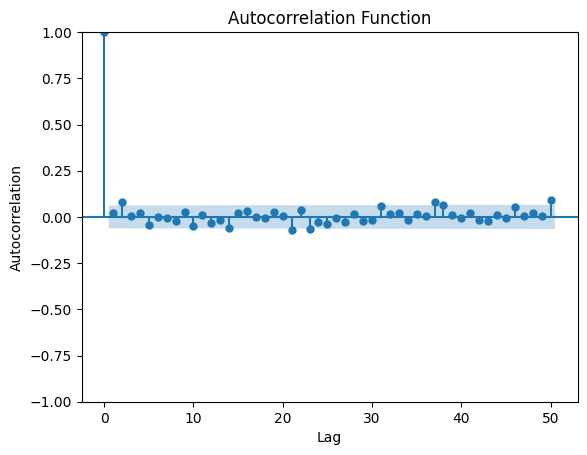

In [11]:
# Analysis Autocorrelation
plot_acf(data['Value'], lags=50)

plt.xlabel('Lag')  # Current time point - Previous time point
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')

plt.show()

# 3. Visualization for Trends: Upward, Downward, Flat Trends

## 3.1. Preparation

In [12]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Generate data
np.random.seed(85)

dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100).cumsum() #np.cumsum(): Cululative Summation

dates, values

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
                '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
                '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
                '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
                '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
                '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
                '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
                '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
                '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
                '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
                '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
                '2023-02-22', '2023-02-23', '2023-02-24', '2023-

In [14]:
# Create a dataframe
data = pd.DataFrame({
    'Date': dates,
    'Values': values
})

data

,Date,Values
0,2023-01-01,0.176851
1,2023-01-02,2.554605
2,2023-01-03,3.553338
3,2023-01-04,2.243187
4,2023-01-05,2.423377
...,...,...
95,2023-04-06,-6.782604
96,2023-04-07,-6.544671
97,2023-04-08,-7.298938
98,2023-04-09,-8.568111


## 3.2. Upward Trends

In [15]:
# Generate data for upward trend
data['Upward_Trend'] = np.linspace(0, 50, len(data))   # np.linspace(): Generate numbers uniformly from Start to End

data['Upward_Trend']

0      0.000000
1      0.505051
2      1.010101
3      1.515152
4      2.020202
        ...    
95    47.979798
96    48.484848
97    48.989899
98    49.494949
99    50.000000
Name: Upward_Trend, Length: 100, dtype: float64

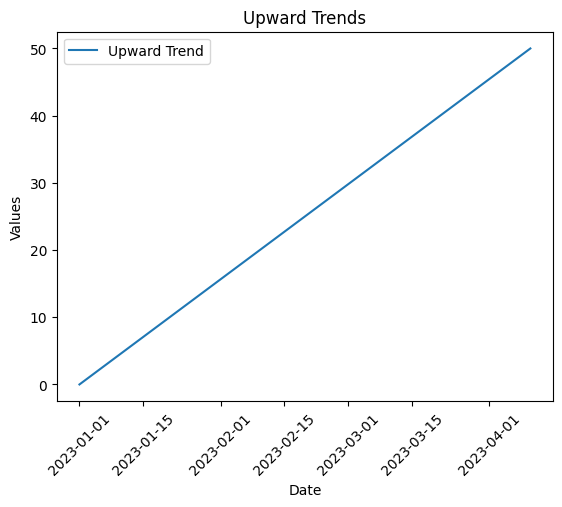

In [16]:
# Visualization
plt.plot(data['Date'], data['Upward_Trend'], label='Upward Trend')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Upward Trends')
plt.legend()
plt.xticks(rotation=45)

plt.show()

## 3.3. Downward Trends

In [17]:
# Generate data
data['Downward_Trend'] = np.linspace(50, 0, len(data))

data['Downward_Trend']

0     50.000000
1     49.494949
2     48.989899
3     48.484848
4     47.979798
        ...    
95     2.020202
96     1.515152
97     1.010101
98     0.505051
99     0.000000
Name: Downward_Trend, Length: 100, dtype: float64

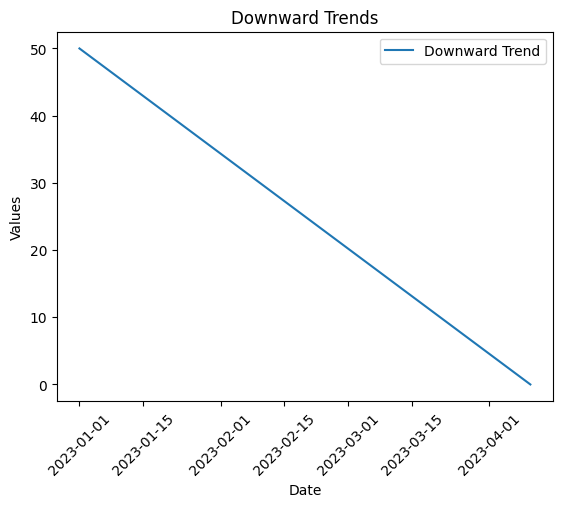

In [18]:
# Visualization
plt.plot(data['Date'], data['Downward_Trend'], label='Downward Trend')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Downward Trends')
plt.legend()
plt.xticks(rotation=45)

plt.show()

## 3.4. Flat Trend

In [19]:
# Generate data
data['Flat_Trend'] = np.full(len(data), 50)

data['Flat_Trend']

0     50
1     50
2     50
3     50
4     50
      ..
95    50
96    50
97    50
98    50
99    50
Name: Flat_Trend, Length: 100, dtype: int32

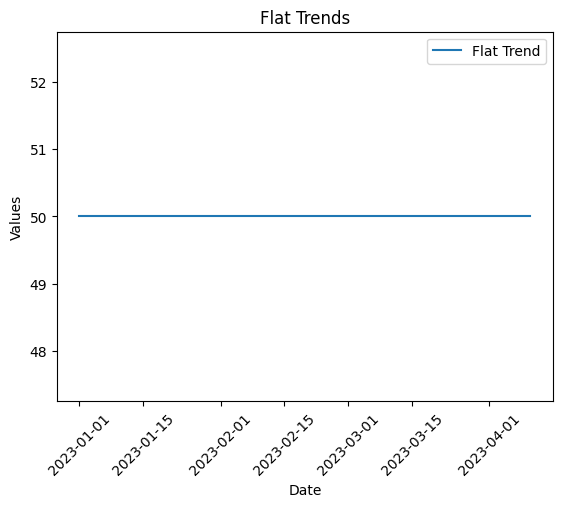

In [20]:
# Visualization
plt.plot(data['Date'], data['Flat_Trend'], label='Flat Trend')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Flat Trends')
plt.legend()
plt.xticks(rotation=45)

plt.show()

# 4. Visualization

## 4.1. Preparation

In [21]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Generate Time Series Data
np.random.seed(85)

dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

dates, values

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10',
                ...
                '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-20',
                '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
                '2025-09-25', '2025-09-26'],
               dtype='datetime64[ns]', length=1000, freq='D'),
 array([ 1.76850721e-01,  2.37775412e+00,  9.98732857e-01, -1.31015080e+00,
         1.80189921e-01, -1.76475402e+00, -1.44312587e+00, -1.39928556e+00,
         8.20353999e-01,  1.29529932e+00,  9.42197422e-01, -2.31932288e-01,
        -6.31397967e-01, -6.42177023e-01, -3.81671601e-01, -1.76344400e+00,
         1.61166821e+00, -8.78108389e-01, -4.98577067e-01,  9.07243402e-01,
         4.13294171e-02,  1.81547474e+00, -1.13014095e+00, -4.72347001e-01,
        -4.97490883e-01,  3.89367783e-02,  1.37619473e+00,  4.91432356e-01,
        

In [23]:
# Create a dataframe
data = pd.DataFrame({
    'Date': dates,
    'Values': values
})
# 
#pd.set_option('display.max_row', 90000)
#pd.set_option('display.max_columns', 100)
data

,Date,Values
0,2023-01-01,0.176851
1,2023-01-02,2.377754
2,2023-01-03,0.998733
3,2023-01-04,-1.310151
4,2023-01-05,0.180190
...,...,...
995,2025-09-22,1.093493
996,2025-09-23,-0.461639
997,2025-09-24,0.801533
998,2025-09-25,-1.393133


## 4.2. Line Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


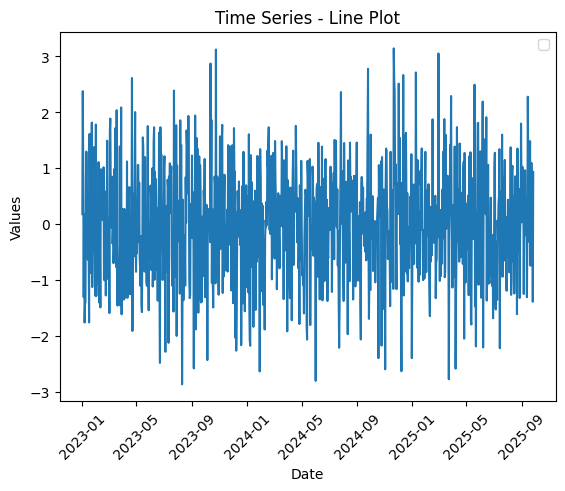

In [24]:
# Visualization
plt.plot(data['Date'], data['Values'])

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series - Line Plot')
plt.legend()
plt.xticks(rotation=45)

plt.show()

## 4.3. Scatter Plot

In [25]:
# Generate data
np.random.seed(85)

dates_scatter_plot = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values_scatter_plot = np.random.rand(1000)

dates_scatter_plot, values_scatter_plot

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10',
                ...
                '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-20',
                '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
                '2025-09-25', '2025-09-26'],
               dtype='datetime64[ns]', length=1000, freq='D'),
 array([0.62037381, 0.50895307, 0.29824484, 0.65379871, 0.27350653,
        0.52312608, 0.37324974, 0.36927859, 0.7346936 , 0.64863888,
        0.92579673, 0.22714814, 0.40555275, 0.88368074, 0.20890112,
        0.21378726, 0.28344035, 0.45312884, 0.33757139, 0.01173726,
        0.39694687, 0.68914231, 0.83520331, 0.31578849, 0.71918911,
        0.50498986, 0.3674922 , 0.18296085, 0.53665916, 0.03160998,
        0.59859214, 0.77609494, 0.22372453, 0.62627289, 0.41232011,
        0.62107257, 0.23957974, 0.30725726, 0.25829266, 0.093765

In [26]:
# Create a Dataframe
data_scatter_plot = pd.DataFrame({
    'Date': dates_scatter_plot,
    'Values' : values_scatter_plot
})

data_scatter_plot

,Date,Values
0,2023-01-01,0.620374
1,2023-01-02,0.508953
2,2023-01-03,0.298245
3,2023-01-04,0.653799
4,2023-01-05,0.273507
...,...,...
995,2025-09-22,0.203958
996,2025-09-23,0.080595
997,2025-09-24,0.379506
998,2025-09-25,0.328634


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


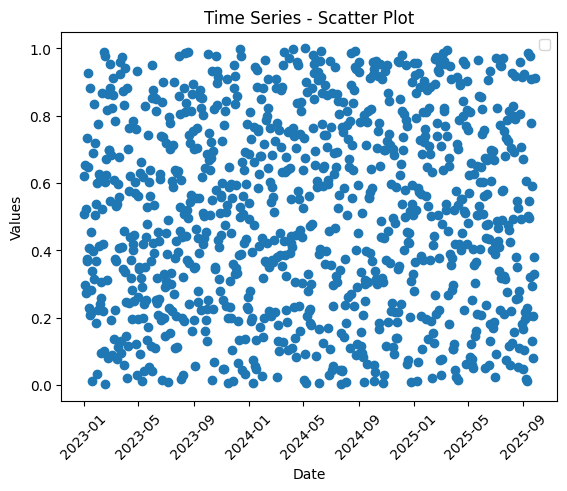

In [27]:
# Visualization
plt.scatter(data_scatter_plot['Date'], data_scatter_plot['Values'])

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series - Scatter Plot')
plt.legend()
plt.xticks(rotation=45)

plt.show()

## 4.4. Bar Plot

In [28]:
# Generate data
np.random.seed(85)

dates_bar_plot = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values_bar_plot = np.random.randn(1000)

dates_bar_plot, values_bar_plot

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10',
                ...
                '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-20',
                '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
                '2025-09-25', '2025-09-26'],
               dtype='datetime64[ns]', length=1000, freq='D'),
 array([ 1.76850721e-01,  2.37775412e+00,  9.98732857e-01, -1.31015080e+00,
         1.80189921e-01, -1.76475402e+00, -1.44312587e+00, -1.39928556e+00,
         8.20353999e-01,  1.29529932e+00,  9.42197422e-01, -2.31932288e-01,
        -6.31397967e-01, -6.42177023e-01, -3.81671601e-01, -1.76344400e+00,
         1.61166821e+00, -8.78108389e-01, -4.98577067e-01,  9.07243402e-01,
         4.13294171e-02,  1.81547474e+00, -1.13014095e+00, -4.72347001e-01,
        -4.97490883e-01,  3.89367783e-02,  1.37619473e+00,  4.91432356e-01,
        

In [29]:
# Create a dataframe
data_bar_plot = pd.DataFrame({
    'Date': dates_bar_plot,
    'Values': values_bar_plot
})

data_bar_plot

,Date,Values
0,2023-01-01,0.176851
1,2023-01-02,2.377754
2,2023-01-03,0.998733
3,2023-01-04,-1.310151
4,2023-01-05,0.180190
...,...,...
995,2025-09-22,1.093493
996,2025-09-23,-0.461639
997,2025-09-24,0.801533
998,2025-09-25,-1.393133


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


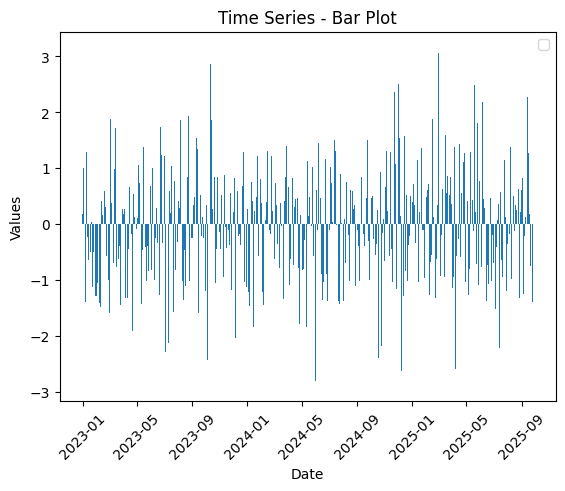

In [30]:
# Visualization
plt.bar(data_bar_plot['Date'], data_bar_plot['Values'])

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series - Bar Plot')
plt.legend()
plt.xticks(rotation=45)

plt.show()

## 4.5. Box Plot

In [31]:
# Generate data
np.random.seed(85)

dates_box_plot = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values_box_plot = np.random.randn(1000)

dates_box_plot, values_box_plot

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10',
                ...
                '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-20',
                '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
                '2025-09-25', '2025-09-26'],
               dtype='datetime64[ns]', length=1000, freq='D'),
 array([ 1.76850721e-01,  2.37775412e+00,  9.98732857e-01, -1.31015080e+00,
         1.80189921e-01, -1.76475402e+00, -1.44312587e+00, -1.39928556e+00,
         8.20353999e-01,  1.29529932e+00,  9.42197422e-01, -2.31932288e-01,
        -6.31397967e-01, -6.42177023e-01, -3.81671601e-01, -1.76344400e+00,
         1.61166821e+00, -8.78108389e-01, -4.98577067e-01,  9.07243402e-01,
         4.13294171e-02,  1.81547474e+00, -1.13014095e+00, -4.72347001e-01,
        -4.97490883e-01,  3.89367783e-02,  1.37619473e+00,  4.91432356e-01,
        

In [32]:
# Creat dataframe
data_box_plot = pd.DataFrame({
    'Date': dates_box_plot,
    'Values': values_box_plot
})

data_box_plot

,Date,Values
0,2023-01-01,0.176851
1,2023-01-02,2.377754
2,2023-01-03,0.998733
3,2023-01-04,-1.310151
4,2023-01-05,0.180190
...,...,...
995,2025-09-22,1.093493
996,2025-09-23,-0.461639
997,2025-09-24,0.801533
998,2025-09-25,-1.393133


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


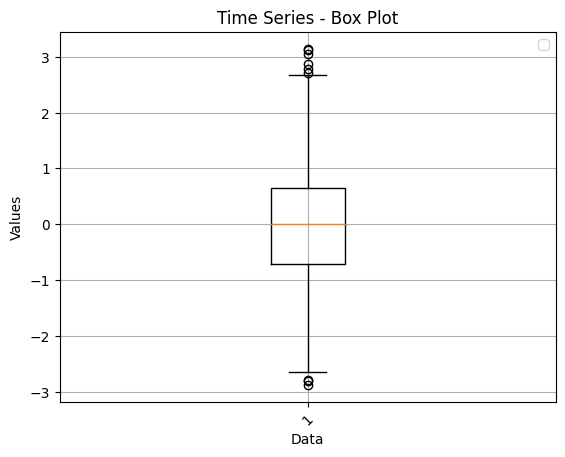

In [33]:
# Visualization
plt.boxplot(data_box_plot['Values'])

plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Time Series - Box Plot')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()

## 4.6. Histogram

In [34]:
# Generate data
np.random.seed(85)

dates_histogram = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values_histogram = np.random.randn(1000)

dates_histogram, values_histogram

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10',
                ...
                '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-20',
                '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
                '2025-09-25', '2025-09-26'],
               dtype='datetime64[ns]', length=1000, freq='D'),
 array([ 1.76850721e-01,  2.37775412e+00,  9.98732857e-01, -1.31015080e+00,
         1.80189921e-01, -1.76475402e+00, -1.44312587e+00, -1.39928556e+00,
         8.20353999e-01,  1.29529932e+00,  9.42197422e-01, -2.31932288e-01,
        -6.31397967e-01, -6.42177023e-01, -3.81671601e-01, -1.76344400e+00,
         1.61166821e+00, -8.78108389e-01, -4.98577067e-01,  9.07243402e-01,
         4.13294171e-02,  1.81547474e+00, -1.13014095e+00, -4.72347001e-01,
        -4.97490883e-01,  3.89367783e-02,  1.37619473e+00,  4.91432356e-01,
        

In [35]:
# Create dataframe
data_histogram = pd.DataFrame({
    'Date': dates_histogram,
    'Values': values_histogram
})

data_histogram

,Date,Values
0,2023-01-01,0.176851
1,2023-01-02,2.377754
2,2023-01-03,0.998733
3,2023-01-04,-1.310151
4,2023-01-05,0.180190
...,...,...
995,2025-09-22,1.093493
996,2025-09-23,-0.461639
997,2025-09-24,0.801533
998,2025-09-25,-1.393133


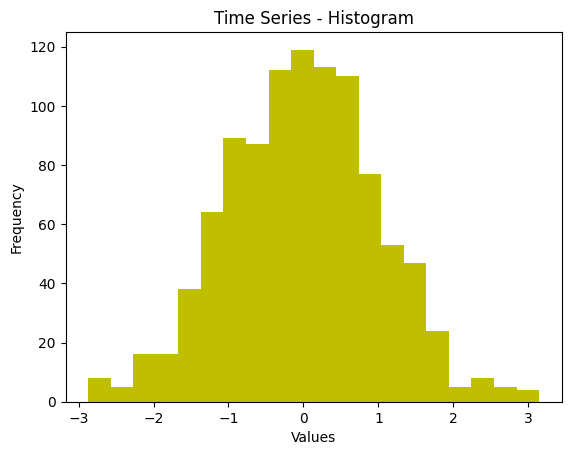

In [36]:
# Visaulization
plt.hist(data_histogram['Values'], bins=20, color='y')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Time Series - Histogram')


plt.show()

## 4.7. Heatmap

In [37]:
# Import modules
import seaborn as sns

In [38]:
# Generate data
np.random.seed(85)

dates_heatmap = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values_heatmap = np.random.randn(1000)

dates_heatmap, values_heatmap

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10',
                ...
                '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-20',
                '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
                '2025-09-25', '2025-09-26'],
               dtype='datetime64[ns]', length=1000, freq='D'),
 array([ 1.76850721e-01,  2.37775412e+00,  9.98732857e-01, -1.31015080e+00,
         1.80189921e-01, -1.76475402e+00, -1.44312587e+00, -1.39928556e+00,
         8.20353999e-01,  1.29529932e+00,  9.42197422e-01, -2.31932288e-01,
        -6.31397967e-01, -6.42177023e-01, -3.81671601e-01, -1.76344400e+00,
         1.61166821e+00, -8.78108389e-01, -4.98577067e-01,  9.07243402e-01,
         4.13294171e-02,  1.81547474e+00, -1.13014095e+00, -4.72347001e-01,
        -4.97490883e-01,  3.89367783e-02,  1.37619473e+00,  4.91432356e-01,
        

In [39]:
# Create dataframe
data_heatmap = pd.DataFrame({
    'Date': dates_heatmap,
    'Values': values_heatmap
})

data_heatmap

,Date,Values
0,2023-01-01,0.176851
1,2023-01-02,2.377754
2,2023-01-03,0.998733
3,2023-01-04,-1.310151
4,2023-01-05,0.180190
...,...,...
995,2025-09-22,1.093493
996,2025-09-23,-0.461639
997,2025-09-24,0.801533
998,2025-09-25,-1.393133


- Pivot Table
  : Summarize data by grouping them by specific columns
  
e.g.
1. Original Data  
Date      value   
23-01-01    A  
23-01-01    B  
23-01-02    A  
23-01-02    C  
23-01-03    B  
23-01-03    C   
   
2. Pivot Table   
          A   B   C    
23-01-01  A   B  NAN    
23-01-02  A  NAN  C   
23-01-03 NAN  B   C   

In [40]:
# Change datatype as Pivot table
pivot_table = data_heatmap.pivot(index='Date', columns='Values', values='Values')

pivot_table

Values,-2.871559,-2.809128,-2.779930,-2.639610,-2.636455,-2.601729,-2.590256,-2.584960,-2.487595,-2.436696,...,2.511202,2.583634,2.612638,2.666294,2.712503,2.778719,2.871724,3.051860,3.122829,3.143356
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-09-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


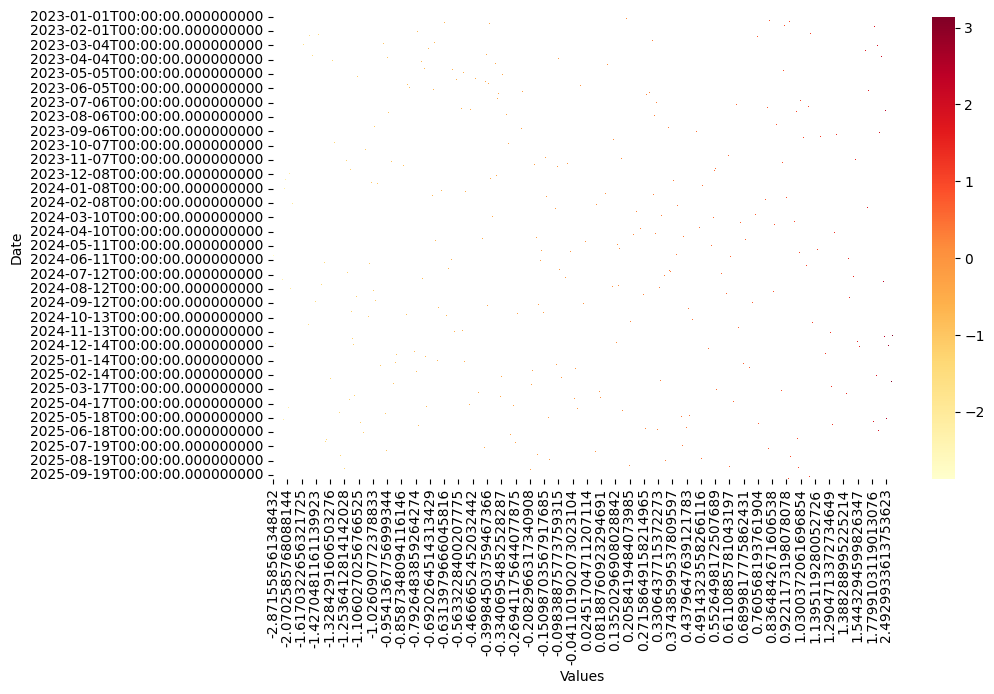

In [41]:
# Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlOrRd', cbar='True')
plt.xlabel('Values')
plt.ylabel('Date')

plt.show()

## 4.8. Decomposition Plot: Trends, Seasonality, Irregularity

In [42]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
# Generate data
np.random.seed(85)

dates_decompose_plot = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values_decompose_plot = np.random.randn(1000)

dates_decompose_plot, values_decompose_plot

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10',
                ...
                '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-20',
                '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
                '2025-09-25', '2025-09-26'],
               dtype='datetime64[ns]', length=1000, freq='D'),
 array([ 1.76850721e-01,  2.37775412e+00,  9.98732857e-01, -1.31015080e+00,
         1.80189921e-01, -1.76475402e+00, -1.44312587e+00, -1.39928556e+00,
         8.20353999e-01,  1.29529932e+00,  9.42197422e-01, -2.31932288e-01,
        -6.31397967e-01, -6.42177023e-01, -3.81671601e-01, -1.76344400e+00,
         1.61166821e+00, -8.78108389e-01, -4.98577067e-01,  9.07243402e-01,
         4.13294171e-02,  1.81547474e+00, -1.13014095e+00, -4.72347001e-01,
        -4.97490883e-01,  3.89367783e-02,  1.37619473e+00,  4.91432356e-01,
        

In [44]:
# Create dataframe
data_decompose_plot = pd.DataFrame({
    'Date': dates_decompose_plot,
    'Values': values_decompose_plot
})

data_decompose_plot

,Date,Values
0,2023-01-01,0.176851
1,2023-01-02,2.377754
2,2023-01-03,0.998733
3,2023-01-04,-1.310151
4,2023-01-05,0.180190
...,...,...
995,2025-09-22,1.093493
996,2025-09-23,-0.461639
997,2025-09-24,0.801533
998,2025-09-25,-1.393133


In [45]:
# Time Series Function
result = seasonal_decompose(data['Values'], model='additive', period=7)

# Create a dataframe

result_df = pd.DataFrame({
    'Date': dates_decompose_plot,
    'Original': values_decompose_plot,
    
})

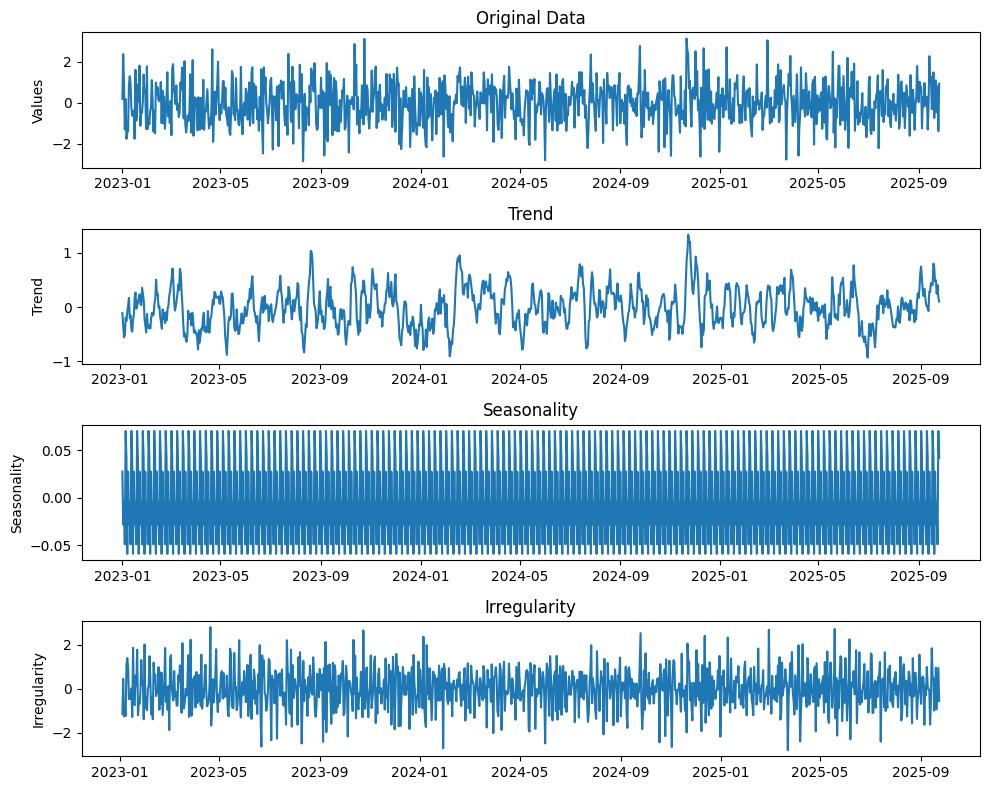

In [46]:
plt.figure(figsize=(10, 8))

# Visualization: Original
plt.subplot(4, 1, 1)
plt.plot(data_decompose_plot['Date'], data_decompose_plot['Values'])
plt.title('Original Data')
plt.ylabel('Values')

# Visualization: Trneds
plt.subplot(4, 1, 2)
plt.plot(data_decompose_plot['Date'], result.trend)
plt.title('Trend')
plt.ylabel('Trend')

# Visualization: Seasonality
plt.subplot(4, 1, 3)
plt.plot(data_decompose_plot['Date'], result.seasonal)
plt.title('Seasonality')
plt.ylabel('Seasonality')

# Visualization: Irregularity
plt.subplot(4, 1, 4)
plt.plot(data_decompose_plot['Date'], result.resid)
plt.title('Irregularity')
plt.ylabel('Irregularity')

plt.tight_layout()
plt.show()

# 5. Data Pre-Processing

## 5.1. Find Missing Values

In [47]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Generate data
data = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5, 6, np.nan, 8, np.nan, 10],
    'B': [np.nan, 12, np.nan, 14, 15, 16, 17, 18, 19, np.nan],
    'C': [21, 22, 23, np.nan, 25, np.nan, 27, 28, 29, 30],
    'D': [31, np.nan, 33, 34, 35, np.nan, 37, 38, np.nan, 40]
})

data

,A,B,C,D
0,1.0,NaN,21.0,31.0
1,2.0,12.0,22.0,NaN
2,NaN,NaN,23.0,33.0
3,4.0,14.0,NaN,34.0
4,5.0,15.0,25.0,35.0
5,6.0,16.0,NaN,NaN
6,NaN,17.0,27.0,37.0
7,8.0,18.0,28.0,38.0
8,NaN,19.0,29.0,NaN
9,10.0,NaN,30.0,40.0


In [49]:
# Check a location of NaN values
data.isnull()

,A,B,C,D
0,False,True,False,False
1,False,False,False,True
2,True,True,False,False
3,False,False,True,False
4,False,False,False,False
5,False,False,True,True
6,True,False,False,False
7,False,False,False,False
8,True,False,False,True
9,False,True,False,False


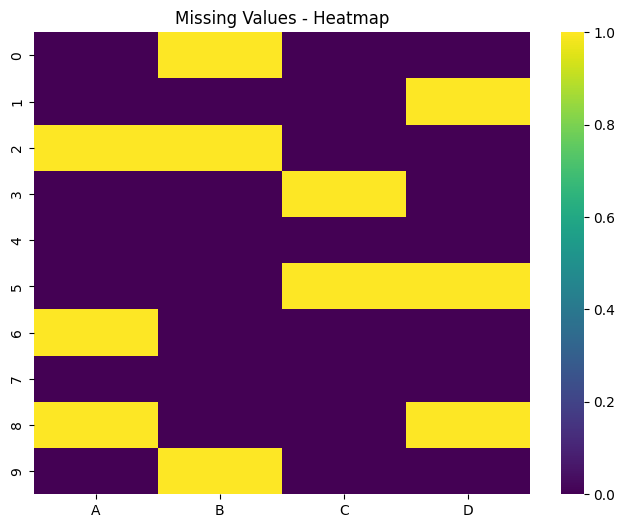

In [50]:
# Visualization: Heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(data.isnull(), cmap='viridis', cbar=True)
plt.title('Missing Values - Heatmap')

plt.show()

In [51]:
# Get the number of Missing Values
missing_count = data.isnull().sum()

missing_count

A    3
B    3
C    2
D    3
dtype: int64

## 5.2. Drop Missing Values

In [52]:
# Import modules
import pandas as pd
import numpy as np

In [53]:
# Generate data
dates_missing_values = pd.date_range(start='2023-01-01', periods=30, freq='D')
values_missing_values = np.random.randn(30)

dates_missing_values, values_missing_values

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
                '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
                '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
                '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
                '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
                '2023-01-29', '2023-01-30'],
               dtype='datetime64[ns]', freq='D'),
 array([-0.06040206,  1.04331607, -0.77151859,  0.26400613, -1.2719181 ,
         0.30281236,  1.45233612, -0.0661759 ,  1.22181845, -0.90544364,
         2.70048608,  0.07764791,  0.17047144,  1.326428  , -0.43958743,
         0.39236985,  0.70395433, -0.45841554, -0.47334643,  0.27344401,
         0.10480311,  0.45777996,  2.06653108,  0.52323218,  1.34123633,
         1.00474765, -1.38171913,  0

In [54]:
# Add missing values
values[15] = np.nan
values[29] = np.nan

In [55]:
# Creat dataframe
data_missing_values = pd.DataFrame({
                    'Date': dates_missing_values,
                    'Values': values_missing_values
})

data_missing_values

,Date,Values
0,2023-01-01,-0.060402
1,2023-01-02,1.043316
2,2023-01-03,-0.771519
3,2023-01-04,0.264006
4,2023-01-05,-1.271918
5,2023-01-06,0.302812
6,2023-01-07,1.452336
7,2023-01-08,-0.066176
8,2023-01-09,1.221818
9,2023-01-10,-0.905444


In [56]:
# Check rows with missing values


In [57]:
# Drop rows with missing values
data_without_missing_values = data_missing_values.dropna(axis=0)

In [58]:
# Check the number of missing values
print("The number of missing values: ")
print(data_missing_values)

The number of missing values: 
         Date    Values
0  2023-01-01 -0.060402
1  2023-01-02  1.043316
2  2023-01-03 -0.771519
3  2023-01-04  0.264006
4  2023-01-05 -1.271918
5  2023-01-06  0.302812
6  2023-01-07  1.452336
7  2023-01-08 -0.066176
8  2023-01-09  1.221818
9  2023-01-10 -0.905444
10 2023-01-11  2.700486
11 2023-01-12  0.077648
12 2023-01-13  0.170471
13 2023-01-14  1.326428
14 2023-01-15 -0.439587
15 2023-01-16  0.392370
16 2023-01-17  0.703954
17 2023-01-18 -0.458416
18 2023-01-19 -0.473346
19 2023-01-20  0.273444
20 2023-01-21  0.104803
21 2023-01-22  0.457780
22 2023-01-23  2.066531
23 2023-01-24  0.523232
24 2023-01-25  1.341236
25 2023-01-26  1.004748
26 2023-01-27 -1.381719
27 2023-01-28  0.604339
28 2023-01-29  0.825585
29 2023-01-30 -0.987865


## 5.3. Linear Interpolation

- Linear Interpolation
  - A method of curve fitting using linear polynomials to construct new data points within the range of a discrete set of known data points

In [59]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Generate Data
dates = pd.date_range(start='2023-01-01', periods=10, freq='D')
values = [1, 2, np.nan, 4, 5, 6, np.nan, np.nan, np.nan, 10]

dates, values

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10'],
               dtype='datetime64[ns]', freq='D'),
 [1, 2, nan, 4, 5, 6, nan, nan, nan, 10])

In [61]:
# Create dataframe
data = pd.DataFrame({
    'Date': dates,
    'Values': values
})

data

,Date,Values
0,2023-01-01,1.0
1,2023-01-02,2.0
2,2023-01-03,NaN
3,2023-01-04,4.0
4,2023-01-05,5.0
5,2023-01-06,6.0
6,2023-01-07,NaN
7,2023-01-08,NaN
8,2023-01-09,NaN
9,2023-01-10,10.0


In [62]:
# Linear Interpolation
data['Values_Interpolated'] = data['Values'].interpolate(method='linear')

data

,Date,Values,Values_Interpolated
0,2023-01-01,1.0,1.0
1,2023-01-02,2.0,2.0
2,2023-01-03,NaN,3.0
3,2023-01-04,4.0,4.0
4,2023-01-05,5.0,5.0
5,2023-01-06,6.0,6.0
6,2023-01-07,NaN,7.0
7,2023-01-08,NaN,8.0
8,2023-01-09,NaN,9.0
9,2023-01-10,10.0,10.0


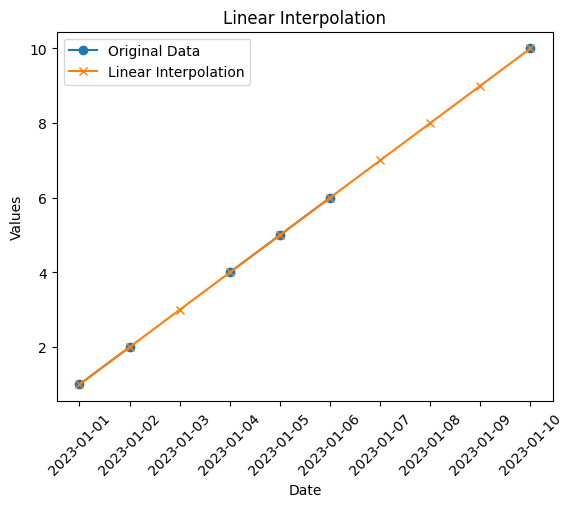

In [63]:
# Visualization
plt.plot(data['Date'], data['Values'], 'o-', label='Original Data')
plt.plot(data['Date'], data['Values_Interpolated'], 'x-', label='Linear Interpolation')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Linear Interpolation')
plt.legend()
plt.xticks(rotation=45)

plt.show()

## 5.4. Spline Interpolation

In [64]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [93]:
# Generate data
np.random.seed(85)
dates_spline_interpolated = pd.date_range(start='2023-01-01', periods=50, freq='D')
values_spline_interpolated = np.random.randn(50)

dates_spline_interpolated, values_spline_interpolated

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
                '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
                '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
                '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
                '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
                '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
                '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
                '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
                '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
                '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
                '2023-02-18', '2023-02-19'],
               dtype='datetime64[ns]', freq='D'),
 array([ 0.17685072,  2.37775412,  0.9987

In [94]:
# Create dataframe
data_spline_interpolated = pd.DataFrame({
    'Date': dates_spline_interpolated,
    'Values': values_spline_interpolated
})

data_spline_interpolated

,Date,Values
0,2023-01-01,0.176851
1,2023-01-02,2.377754
2,2023-01-03,0.998733
3,2023-01-04,-1.310151
4,2023-01-05,0.180190
5,2023-01-06,-1.764754
6,2023-01-07,-1.443126
7,2023-01-08,-1.399286
8,2023-01-09,0.820354
9,2023-01-10,1.295299


In [95]:
# Add missing values
data_spline_interpolated.loc[10:20, 'Values'] = np.nan

In [96]:
# Check the missing values
data_spline_interpolated.loc[10:20]

,Date,Values
10,2023-01-11,NaN
11,2023-01-12,NaN
12,2023-01-13,NaN
13,2023-01-14,NaN
14,2023-01-15,NaN
15,2023-01-16,NaN
16,2023-01-17,NaN
17,2023-01-18,NaN
18,2023-01-19,NaN
19,2023-01-20,NaN


In [97]:
# Replace missing values using Linear Interpolation
data_spline_interpolated['Value_Linear'] = data_spline_interpolated['Values'].interpolate(method='linear')
print(data_spline_interpolated.loc[10:20])

         Date  Values  Value_Linear
10 2023-01-11     NaN      1.338647
11 2023-01-12     NaN      1.381995
12 2023-01-13     NaN      1.425343
13 2023-01-14     NaN      1.468691
14 2023-01-15     NaN      1.512039
15 2023-01-16     NaN      1.555387
16 2023-01-17     NaN      1.598735
17 2023-01-18     NaN      1.642083
18 2023-01-19     NaN      1.685431
19 2023-01-20     NaN      1.728779
20 2023-01-21     NaN      1.772127


In [98]:
# Spline Interpolation
spline = CubicSpline(data_spline_interpolated.index, data_spline_interpolated['Value_Linear'])
data_spline_interpolated['Value_Spline'] = spline(data_spline_interpolated.index)

print(data_spline_interpolated.loc[10:20])

         Date  Values  Value_Linear  Value_Spline
10 2023-01-11     NaN      1.338647      1.338647
11 2023-01-12     NaN      1.381995      1.381995
12 2023-01-13     NaN      1.425343      1.425343
13 2023-01-14     NaN      1.468691      1.468691
14 2023-01-15     NaN      1.512039      1.512039
15 2023-01-16     NaN      1.555387      1.555387
16 2023-01-17     NaN      1.598735      1.598735
17 2023-01-18     NaN      1.642083      1.642083
18 2023-01-19     NaN      1.685431      1.685431
19 2023-01-20     NaN      1.728779      1.728779
20 2023-01-21     NaN      1.772127      1.772127


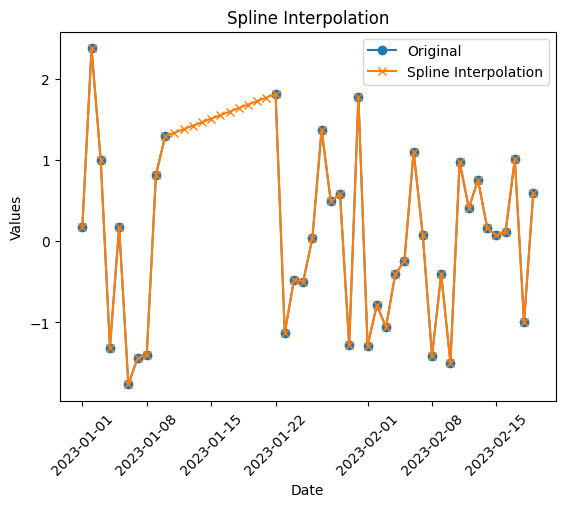

In [99]:
# Visualization
plt.plot(data_spline_interpolated['Date'], data_spline_interpolated['Values'], 'o-', label='Original')
plt.plot(data_spline_interpolated['Date'], data_spline_interpolated['Value_Spline'], 'x-', label='Spline Interpolation')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Spline Interpolation')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## 5.5. Nearest Neighbor Interpolation

In [92]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
# Generate data
np.random.seed(85)

dates_nearest_neighbor = pd.date_range(start='2023-01-01', periods=500, freq='D')
values_nearest_neighbor = np.random.randn(500)

dates_nearest_neighbor, values_nearest_neighbor

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10',
                ...
                '2024-05-05', '2024-05-06', '2024-05-07', '2024-05-08',
                '2024-05-09', '2024-05-10', '2024-05-11', '2024-05-12',
                '2024-05-13', '2024-05-14'],
               dtype='datetime64[ns]', length=500, freq='D'),
 array([ 1.76850721e-01,  2.37775412e+00,  9.98732857e-01, -1.31015080e+00,
         1.80189921e-01, -1.76475402e+00, -1.44312587e+00, -1.39928556e+00,
         8.20353999e-01,  1.29529932e+00,  9.42197422e-01, -2.31932288e-01,
        -6.31397967e-01, -6.42177023e-01, -3.81671601e-01, -1.76344400e+00,
         1.61166821e+00, -8.78108389e-01, -4.98577067e-01,  9.07243402e-01,
         4.13294171e-02,  1.81547474e+00, -1.13014095e+00, -4.72347001e-01,
        -4.97490883e-01,  3.89367783e-02,  1.37619473e+00,  4.91432356e-01,
         

In [120]:
# Create dataframe
data_nearest_neighbor = pd.DataFrame({
    'Date': dates_nearest_neighbor,
    'Values': values_nearest_neighbor
})

data_nearest_neighbor

,Date,Values
0,2023-01-01,0.176851
1,2023-01-02,2.377754
2,2023-01-03,0.998733
3,2023-01-04,-1.310151
4,2023-01-05,0.180190
...,...,...
495,2024-05-10,0.546263
496,2024-05-11,0.529778
497,2024-05-12,-1.835970
498,2024-05-13,-2.070259


In [121]:
# Add missing values
data_nearest_neighbor.loc[20:80, 'Values'] = np.nan

data_nearest_neighbor.loc[20:80]

,Date,Values
20,2023-01-21,NaN
21,2023-01-22,NaN
22,2023-01-23,NaN
23,2023-01-24,NaN
24,2023-01-25,NaN
...,...,...
76,2023-03-18,NaN
77,2023-03-19,NaN
78,2023-03-20,NaN
79,2023-03-21,NaN


In [122]:
# Handle missing values: Nearest Neighbors Interpolation
data_nearest_neighbor['Value_interpolated'] = data_nearest_neighbor['Values'].interpolate(method='nearest')

print(data_nearest_neighbor[20:80])

         Date  Values  Value_interpolated
20 2023-01-21     NaN            0.907243
21 2023-01-22     NaN            0.907243
22 2023-01-23     NaN            0.907243
23 2023-01-24     NaN            0.907243
24 2023-01-25     NaN            0.907243
25 2023-01-26     NaN            0.907243
26 2023-01-27     NaN            0.907243
27 2023-01-28     NaN            0.907243
28 2023-01-29     NaN            0.907243
29 2023-01-30     NaN            0.907243
30 2023-01-31     NaN            0.907243
31 2023-02-01     NaN            0.907243
32 2023-02-02     NaN            0.907243
33 2023-02-03     NaN            0.907243
34 2023-02-04     NaN            0.907243
35 2023-02-05     NaN            0.907243
36 2023-02-06     NaN            0.907243
37 2023-02-07     NaN            0.907243
38 2023-02-08     NaN            0.907243
39 2023-02-09     NaN            0.907243
40 2023-02-10     NaN            0.907243
41 2023-02-11     NaN            0.907243
42 2023-02-12     NaN            0

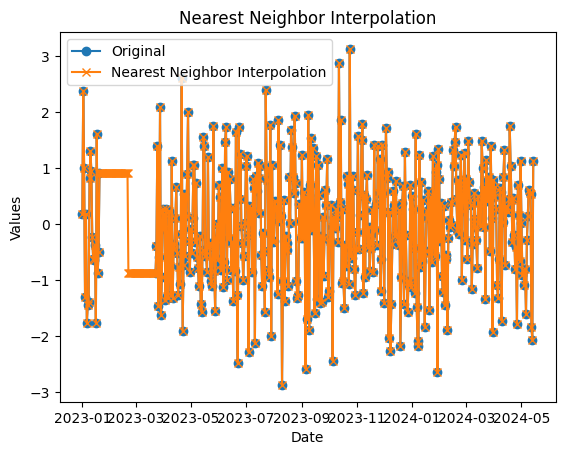

In [123]:
# Visualization
plt.plot(data_nearest_neighbor['Date'], data_nearest_neighbor['Values'], 'o-', label='Original')
plt.plot(data_nearest_neighbor['Date'], data_nearest_neighbor['Value_interpolated'], 'x-', label='Nearest Neighbor Interpolation')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Nearest Neighbor Interpolation')
plt.legend()
plt.show()

## 5.6. Mean Inputation

In [124]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
# Generate data
np.random.seed(85)

dates_mean_inputation = pd.date_range(start='2023-01-01', periods=500, freq='D')
values_mean_inputation = np.random.randn(500)

dates_mean_inputation, values_mean_inputation

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10',
                ...
                '2024-05-05', '2024-05-06', '2024-05-07', '2024-05-08',
                '2024-05-09', '2024-05-10', '2024-05-11', '2024-05-12',
                '2024-05-13', '2024-05-14'],
               dtype='datetime64[ns]', length=500, freq='D'),
 array([ 1.76850721e-01,  2.37775412e+00,  9.98732857e-01, -1.31015080e+00,
         1.80189921e-01, -1.76475402e+00, -1.44312587e+00, -1.39928556e+00,
         8.20353999e-01,  1.29529932e+00,  9.42197422e-01, -2.31932288e-01,
        -6.31397967e-01, -6.42177023e-01, -3.81671601e-01, -1.76344400e+00,
         1.61166821e+00, -8.78108389e-01, -4.98577067e-01,  9.07243402e-01,
         4.13294171e-02,  1.81547474e+00, -1.13014095e+00, -4.72347001e-01,
        -4.97490883e-01,  3.89367783e-02,  1.37619473e+00,  4.91432356e-01,
         

In [155]:
# Creat dataframe
data_mean_imputation = pd.DataFrame({
    'Date': dates_mean_inputation,
    'Values': values_mean_inputation
})

data_mean_imputation

,Date,Values
0,2023-01-01,0.176851
1,2023-01-02,2.377754
2,2023-01-03,0.998733
3,2023-01-04,-1.310151
4,2023-01-05,0.180190
...,...,...
495,2024-05-10,0.546263
496,2024-05-11,0.529778
497,2024-05-12,-1.835970
498,2024-05-13,-2.070259


In [156]:
# Add missing values
data_mean_imputation.loc[100:200, 'Values'] = np.nan

print(data_mean_imputation.loc[100:200])

          Date  Values
100 2023-04-11     NaN
101 2023-04-12     NaN
102 2023-04-13     NaN
103 2023-04-14     NaN
104 2023-04-15     NaN
..         ...     ...
196 2023-07-16     NaN
197 2023-07-17     NaN
198 2023-07-18     NaN
199 2023-07-19     NaN
200 2023-07-20     NaN

[101 rows x 2 columns]


In [157]:
# Handling missing values: Mean Imputation

# Get mean value
mean_value = data_mean_imputation['Values'].mean()
print('Mean Value: ', mean_value, '\n\n')

# Mean Inputation
data_mean_imputation['Value_Imputated'] = data_mean_imputation['Values'].fillna(mean_value)

print(data_mean_inputation.loc[100:200])

Mean Value:  -0.031183521269212536 


          Date    Values  Value
100 2023-04-11 -1.323133    NaN
101 2023-04-12 -0.353689    NaN
102 2023-04-13 -0.440077    NaN
103 2023-04-14  0.113882    NaN
104 2023-04-15  0.661003    NaN
..         ...       ...    ...
196 2023-07-16  0.813310    NaN
197 2023-07-17  1.030579    NaN
198 2023-07-18 -0.547423    NaN
199 2023-07-19 -1.104681    NaN
200 2023-07-20 -0.162095    NaN

[101 rows x 3 columns]


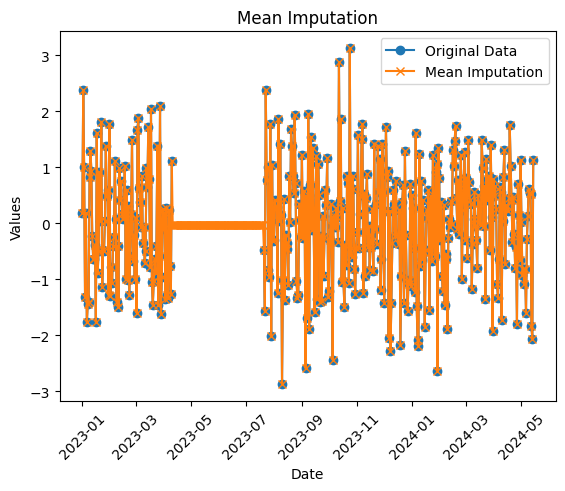

In [159]:
# Visualization
plt.plot(data_mean_imputation['Date'], data_mean_imputation['Values'], 'o-', label='Original Data')
plt.plot(data_mean_imputation['Date'], data_mean_imputation['Value_Imputated'], 'x-', label='Mean Imputation')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Mean Imputation')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 6. Time Series Data Models

## 6.1. ARIMA(Autogressive Integrated Moving Average) Model

In [160]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [163]:
# Generate data
np.random.seed(85)

dates_arima = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values_arima = np.random.randn(1000)

dates_arima, values_arima

(DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
                '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
                '2023-01-09', '2023-01-10',
                ...
                '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-20',
                '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
                '2025-09-25', '2025-09-26'],
               dtype='datetime64[ns]', length=1000, freq='D'),
 array([ 1.76850721e-01,  2.37775412e+00,  9.98732857e-01, -1.31015080e+00,
         1.80189921e-01, -1.76475402e+00, -1.44312587e+00, -1.39928556e+00,
         8.20353999e-01,  1.29529932e+00,  9.42197422e-01, -2.31932288e-01,
        -6.31397967e-01, -6.42177023e-01, -3.81671601e-01, -1.76344400e+00,
         1.61166821e+00, -8.78108389e-01, -4.98577067e-01,  9.07243402e-01,
         4.13294171e-02,  1.81547474e+00, -1.13014095e+00, -4.72347001e-01,
        -4.97490883e-01,  3.89367783e-02,  1.37619473e+00,  4.91432356e-01,
        

In [164]:
# Create dataframe
data_arima = pd.DataFrame({
    'Date': dates_arima,
    'Values': values_arima
})

data_arima

,Date,Values
0,2023-01-01,0.176851
1,2023-01-02,2.377754
2,2023-01-03,0.998733
3,2023-01-04,-1.310151
4,2023-01-05,0.180190
...,...,...
995,2025-09-22,1.093493
996,2025-09-23,-0.461639
997,2025-09-24,0.801533
998,2025-09-25,-1.393133


In [165]:
# Add missing values
data_arima.loc[100:200, 'Values'] = np.nan

print(data_arima.loc[100:200])

          Date  Values
100 2023-04-11     NaN
101 2023-04-12     NaN
102 2023-04-13     NaN
103 2023-04-14     NaN
104 2023-04-15     NaN
..         ...     ...
196 2023-07-16     NaN
197 2023-07-17     NaN
198 2023-07-18     NaN
199 2023-07-19     NaN
200 2023-07-20     NaN

[101 rows x 2 columns]


order=(1,1,1) 매개변수를 사용하여 ARIMA 모델을 설정합니다. order 매개변수는 AR, 차분(Differencing), MA 성분을 지정합니다. 여기서 (1,1,1)은 AR(1) 모델, 차분(degree of differencing)이 1, 그리고 MA(1) 모델을 의미합니다.
ARIMA 모델은 시계열 데이터의 자동회귀(AR) 성분, 차분(Differencing) 성분, 이동평균(MA) 성분을 모두 고려하여 시계열 패턴을 모델링합니다..

In [173]:
# ARIMA model

# Get ARIMA model without missing values
model_arima = ARIMA(data_arima['Values'].dropna(), order=(1,  # Automagressive model
                                                          1,  # Degree of Difference
                                                          1)) # Moving Average

# Train the model
model_arima_fit = model_arima.fit()

C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [171]:
# Predict missing values
predicted_values = model_arima_fit.predict(start=100, end=2000)

predicted_values

C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


100    -0.092678
101    -0.072469
102    -0.070779
103    -0.106376
104    -0.073661
          ...   
1996    0.000630
1997    0.000630
1998    0.000630
1999    0.000630
2000    0.000630
Name: predicted_mean, Length: 1901, dtype: float64

In [172]:
# Replace missing values with Predicted values by ARIMA model
data_arima.loc[100:200, 'Value_ARIMA'] = predicted_values
print(data_arima.loc[100:200])

          Date  Values  Value_ARIMA
100 2023-04-11     NaN    -0.092678
101 2023-04-12     NaN    -0.072469
102 2023-04-13     NaN    -0.070779
103 2023-04-14     NaN    -0.106376
104 2023-04-15     NaN    -0.073661
..         ...     ...          ...
196 2023-07-16     NaN    -0.083252
197 2023-07-17     NaN    -0.031421
198 2023-07-18     NaN    -0.031956
199 2023-07-19     NaN    -0.049374
200 2023-07-20     NaN    -0.042439

[101 rows x 3 columns]


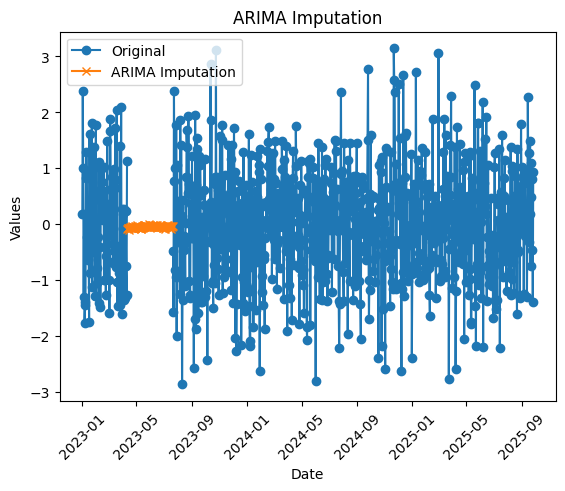

In [175]:
# Visualization
plt.plot(data_arima['Date'], data_arima['Values'], 'o-', label='Original')
plt.plot(data_arima['Date'], data_arima['Value_ARIMA'], 'x-', label='ARIMA Imputation')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('ARIMA Imputation')
plt.legend()
plt.xticks(rotation=45)
plt.show()